In [61]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
import copy

In [62]:
dataset = pd.read_csv('D:\Datasets\Tennis.csv')
X = dataset.iloc[:,:].values
X

array([['Sunny', 'Hot', 'High', 'Weak', 'No'],
       ['Sunny', 'Hot', 'High', 'Strong', 'No'],
       ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
       ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
       ['Sunny', 'Mild', 'High', 'Weak', 'No'],
       ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
       ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
       ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
       ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Strong', 'No']], dtype=object)

In [63]:
attribute = ['Outlook', 'Temp', 'Humidity', 'Wind']

In [64]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.child = None

In [65]:
def findEntropy(data, rows):
    yes=0
    no=0
    ans=-1
    idx=len(data[0])-1
    entropy=0
    
    for i in rows:
        if data[i][idx]=='Yes':
            yes=yes+1
        else:
            no=no+1
            
    x=yes/(yes+no)
    y=no/(yes+no)
    if x!=0 and y!=0:
        entropy= -1*(x*math.log2(x)+y*math.log2(y))
    if x==1:
        ans = 1
    if y==1:
        ans = 0
    return entropy, ans

In [66]:
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans
    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy

        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
            # print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j

    return maxGain, retidx, ans


In [67]:
def buildTree(data, rows, columns):
    
    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain)
    
    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root
    
    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1

    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root

In [68]:
def traverse(root):
    print(root.decision)
    print(root.value)

    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])

In [69]:
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)

In [70]:
calculate()

Start
Outlook
Sunny
Humidity
High
No
Normal
Yes
Overcast
Yes
Rain
Wind
Weak
Yes
Strong
No


## The following will the final Decision Tree:
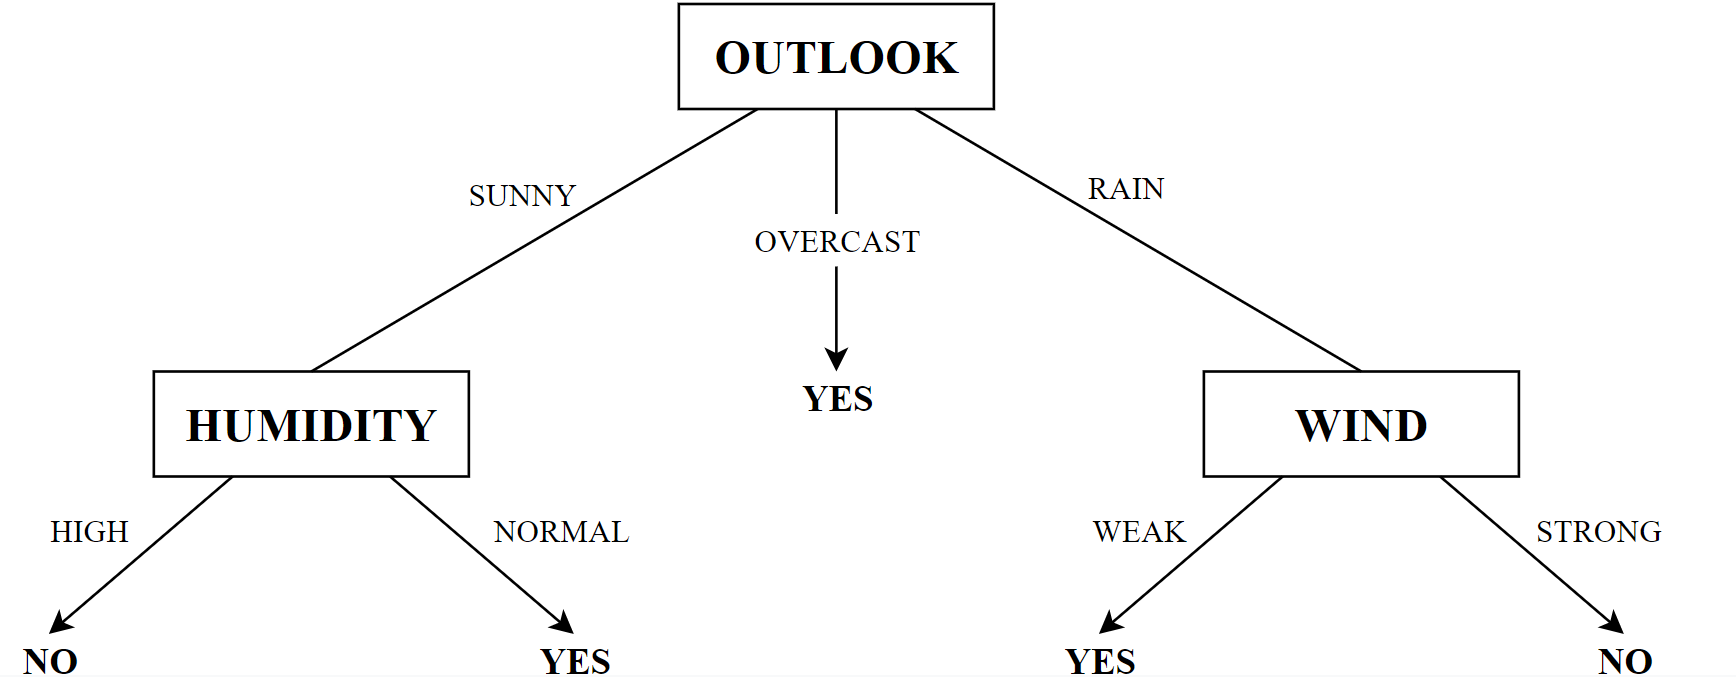